In [1]:
import ROOT
import os
from my_utils import *
import fst



Welcome to JupyROOT 6.14/04


In [2]:
#fst.take_data(events=500)
fst.take_data(time=10)

GO4-*> Reading library: libGo4UserAnalysis  
GO4-*> Close of TUserSource  
GO4-*> Create default analysis with processor class TFirstStepProcessor  
GO4-*> Use class TStreamEvent as output event  
GO4-*> Welcome to Go4 Analysis Framework Release v5.9.0 (build 50900) !  
GO4-*> Analysis: Added analysis step Analysis  
GO4-*> Main: starting analysis in batch mode ...    
GO4-!> Fail to open AutoSave file Go4AutoSave.root  
GO4-*> Analysis LoadObjects: Failed to load from file Go4AutoSave.root  
Use MBS source port 6790
f_evt_get_open for STREAM: port=6790 timeout=1  
GO4-*> Factory: Create input event for MBS  
GO4-*> Event MbsEvent101 has source localhost:6790 class: TGo4MbsStream  
GO4-*> Factory: Create event processor Processor  
GO4-*> Create TFirstStepProcessor Processor  
GO4-*> Executing ROOT script first.C  
HLD configure calibration calfile:test_  cnt:0 trig:0 temp:0
GO4-*> Executing ROOT script second.C+  
Create Sec_0350 for TDC_0350
Create Sec_0351 for TDC_0351
GO4-*> Factor

rm: cannot remove '*.root': No such file or directory
Info in <TUnixSystem::ACLiC>: creating shared library /workdir/./second_C.so


Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Hit is available


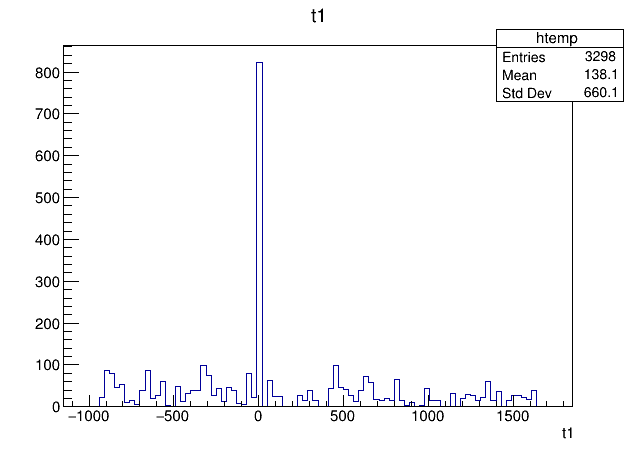

In [3]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

f = ROOT.TFile("/workdir/joint_tree.root")
tree = f.Get("joint_tree")
tree.Draw("t1","","")
#tree.Draw("tot_a:t1_a >> potato(500,0,500e-9,500,0,500e-9)","","colz")

#potato = f.Get("potato")
#potato.SetTitle("potato")
#potato.GetXaxis().SetTitle("t1 (s)")
#potato.GetYaxis().SetTitle("tot (s)")
#potato.Draw("colz")
c.Draw()

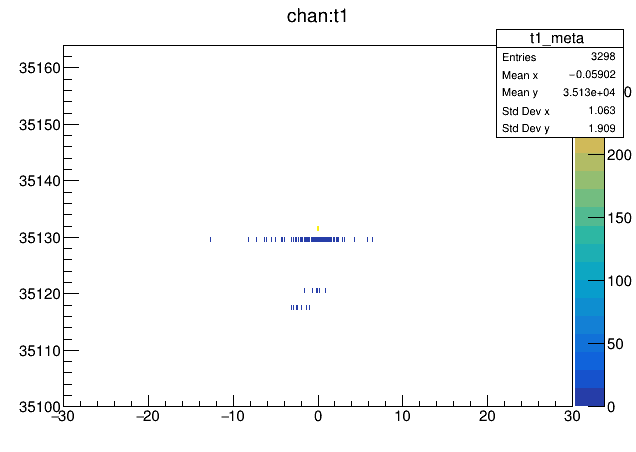

In [4]:
tdc=351
disp_channels = 64
tree.Draw("chan:t1>>t1_meta(1000,-30,30,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

-5.300020988970622e-08
559.0
1.7065651926230582e-06


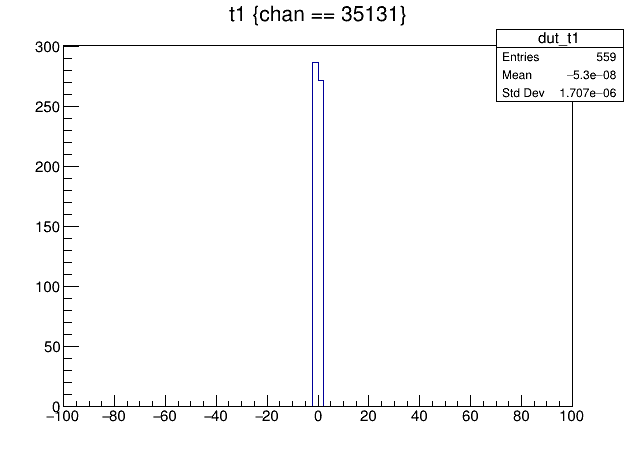

In [5]:
##################################################
##              horiz scintillator              ##
##################################################


tdc=351
chan = 31
tree.Draw("t1>>dut_t1(100,-100,100)","chan == {:d}".format(tdc*100+chan),"colz")
c.Draw()
dut_t1 = f.Get("dut_t1")
print(dut_t1.GetMean())
print(dut_t1.GetEntries())
print(dut_t1.GetStdDev())

-0.13165428215870634
8.0
0.7687424055177436


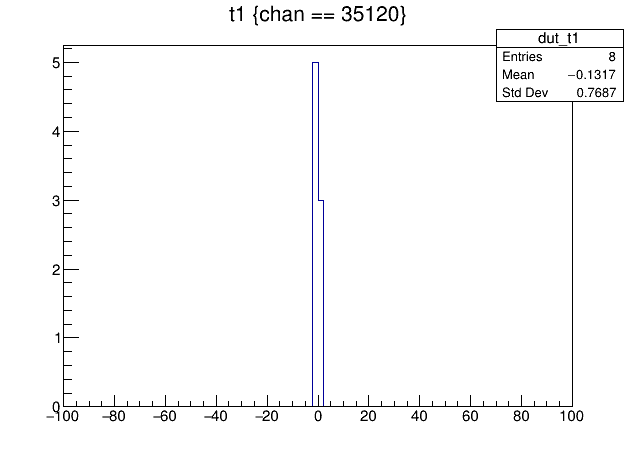

In [6]:
##################################################
##               vert scintillator              ##
##################################################


tdc=351
chan = 20
tree.Draw("t1>>dut_t1(100,-100,100)","chan == {:d}".format(tdc*100+chan),"colz")
c.Draw()
dut_t1 = f.Get("dut_t1")
print(dut_t1.GetMean())
print(dut_t1.GetEntries())
print(dut_t1.GetStdDev())